In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Final
from scipy.optimize import minimize
import matplotlib.patches as patches
%matplotlib inline

Task 1

a)

$$\min_{x \in \mathbb{R} ^4} (-8,  2,  1, -9) \cdot x$$
$$\textrm{s.t. } x_1 \geq 2$$
$$-x_1 \geq -5$$
$$ x_2 \geq -5 $$
$$ -x_2 \geq 4 $$
$$ x_3 \geq -18 $$
$$ -x_3 \geq -18 $$
$$ x_4 \geq -1 $$
$$ -x_4 \geq -1 $$

b)

We want to minimize/maximize the value of a linear function $f(x)=y^T \cdot x$ with box constraints $l_i \leq x_i \leq u_i$. To get the minimum value we just have to choose $x_i = l_i$ if $y_i > 0 $ else choose $x_i = u_i$. For maximizing the value we just need to do the opposite in both cases.

c) As we can see below the minimum of f is -77 with x = [5, -5, -18, 1]

In [2]:
def min_max(y, l, u):
    # Minimize
    x_min = [l[i] if y[i] > 0 else u[i] for i in range(len(y))]
    f_min = sum(y[i] * x_min[i] for i in range(len(y)))

    # Maximize
    x_max = [u[i] if y[i] > 0 else l[i] for i in range(len(y))]
    f_max = sum(y[i] * x_max[i] for i in range(len(y)))
    
    return x_min, f_min, x_max, f_max

y = [-8,2,1,-9]
l = [2, -5, -18, -1]
u = [5,-4,18,1]
x_min, f_min, _, _ = min_max(y,l,u)

print(f"The minimum of f is {f_min} with x = {x_min}")

The minimum of f is -77 with x = [5, -5, -18, 1]


Task 2

$f(x)=\frac{x^4}{12} - \frac{x \cdot \cos{(8x)}}{64} + \frac{\sin{(8x)}}{256}$

a)

$f'(x) = \frac{x^3}{3} - (\frac{\cos{(8x)}}{64} + \frac{x \cdot (-\sin{(8x)}) \cdot 8}{64}) + \frac{\cos{(8x)} \cdot 8}{256} = \frac{x^3}{3} - \frac{\cos{(8x)}}{64} + \frac{x \cdot \sin{(8x)}}{8} + \frac{\cos{(8x)}}{32} = \frac{x^3}{3} + \frac{\cos{(8x)}}{64} + \frac{x \cdot \sin{(8x)}}{8}$

$f''(x) = x^2 + \frac{(-\sin{(8x)}) \cdot 8}{64} + \frac{\sin{(8x)}}{8} + \frac{x \cdot \cos{(8x)} \cdot 8}{8} = x^2 -\frac{\sin{(8x)}}{8} + \frac{\sin{(8x)}}{8} + x \cdot \cos{(8x)} = x^2 + x \cdot \cos{(8x)}$

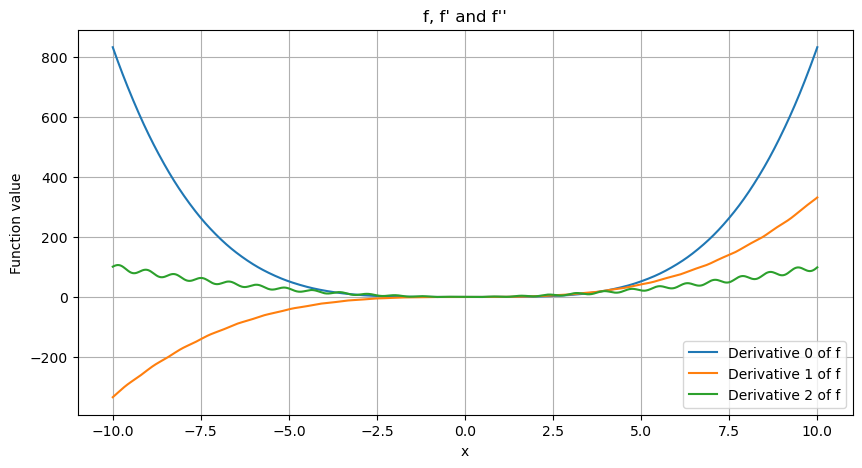

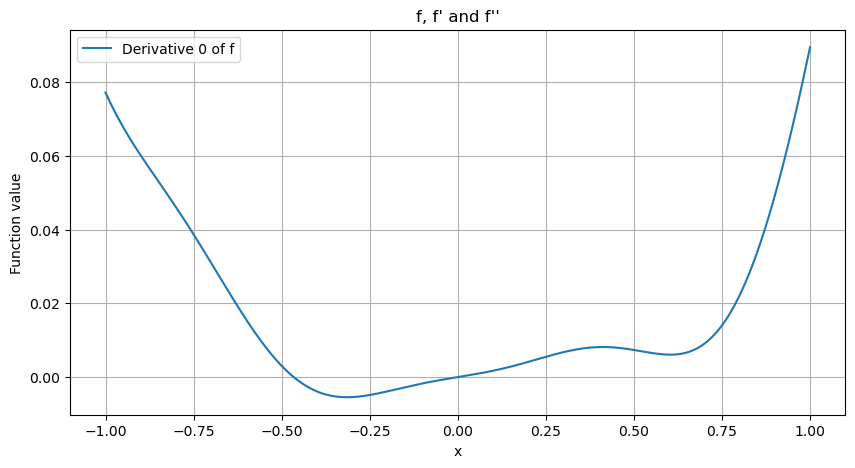

In [3]:

# Task 2 b)
def f(x):
    return x**4/12 - (x * np.cos(8*x))/64 + np.sin(8*x)/256

def f_prime(x):
    return x**3/3 + np.cos(8*x)/64 + x*np.sin(8*x)/8

def f_prime_prime(x):
    return x**2 + x*np.cos(8*x)

x = np.linspace(-10, 10, 1000)

func_values = [f(x), f_prime(x), f_prime_prime(x)]

plt.figure(figsize=(10, 5))
for i, y in enumerate(func_values):
    plt.plot(x, y, label=f'Derivative {i} of f')
plt.title("f, f' and f''")
plt.xlabel("x")
plt.ylabel("Function value")
plt.legend()
plt.grid()
plt.show()


x_2 = np.linspace(-1, 1, 1000)
func_values_2 = [f(x_2)]

plt.figure(figsize=(10, 5))
for i, y in enumerate(func_values_2):
    plt.plot(x_2, y, label=f'Derivative {i} of f')
plt.title("f, f' and f''")
plt.xlabel("x")
plt.ylabel("Function value")
plt.legend()
plt.grid()
plt.show()

In the graph for $x \in [-10,10]$ f looks like it is convex and has a rather parabolic shape. You can not directly spot a global minimum, as the function is really flat in the range of $x \in [-2.5,2.5]$ and also overlapped by the graphs of its derivatives. But when zooming in on the graph one can see that the function f is not convex, as there is a local maximum between two local minima. You can now also see the global minimum around x=-0.35. It is visible that in a small range around that global minimum f is convex, but in the positive x-direction that is limited by the local maximum at around 0.4 at most. There may also be an area in between x=-0.35 and 0.4 where the function is not convex, but without an analytic approach that is hard to determine, as it is not that clearly visible in the graph.

c)

f is only convex in an interval $I=[I_l,I_u]$, in which $f''(x) \geq 0 \quad \forall x \in I$. So we need to find this interval around the global minimum and then change the problem in the following way:
$$\min_{x \in \mathbb{R}} f(x)$$
$$\textrm{s.t. } -(I_l-x) \geq 0$$
$$ I_u-x \geq 0 $$


***

# Problem 3

$$\max_{x \in R^2} \frac{1}{\sqrt2}||v-x||$$
$$s.t ||x||=1$$

**(3a)**

To state the geometric interpretation of the problem, we first note that $|x|=1$ which means that $x$ is a unit vector. 

The problem is asking for a value of $x$ that maximizes the distance between vector $x$ and an arbitrary vector $v$. 

If we place place both vectors $\bf{v}$ and $\bf{x}$ at the origin, then the values that $\bf{x}$ will take lie on the circle with the center at the origin and radius $\bf{|x|}$

Since $|v-x|$ is positive, then maximizing it is equivalent to maximizing its square. Therefore, a standard form for the problem is:

$$\min_{x \in R^2} \frac{1}{2}(-||v||^2+2v^Tx-||x||^2)$$
$$s.t ||x|| =1$$
This is then equivalent to:
$$\min_{x \in R^2} -||v||^2+2v^Tx-||x||^2$$
$$s.t ||x|| =1$$

Since the arbitrary vector $\bf{v}$ is constant and $\bf{||x||} = 1$. then this problem is equivalent to:
$$\min_{x \in R^2} v^T x$$
$$s.t ||x|| =1$$

**3b**

$$L(x, \lambda) = v^Tx+\lambda(||x||-1)$$ 

$$\nabla_x L = v + \lambda \frac{x}{||x||}$$

By equating $\nabla_x L$ to $0$, we get:

$$x = \frac{-v}{\lambda}$$
Since $||x||=1$, then the only value of $\lambda$ that would make sence is $||v||$

Therefore:
$$x=\frac{-v}{||v||}$$
Intuitively, this means that $\bf{x}$ is the unit vector going in the opposite direction of $\bf{v}$


**3c**

Let $\phi(t) = (sin(t), cos(t))$ be a vector valued function
$$\max_{t \in R} \frac{1}{\sqrt2}||v-\phi(t)||$$

We note that: $$||\phi(t)|| = sin^2(t) + cos^2(t)=1=||x||$$ for any value of $t$, then this optimization problem is equivalent to the one provided in 3b

We can drop the constraints because, regardless of the value of $t$, $||\phi(t)||$ will always be equal to one.


The feasible set is the unit circle denoted in the matplotlib plot below

Converged after 15 iterations.
Optimal t: 2.7831229186192727


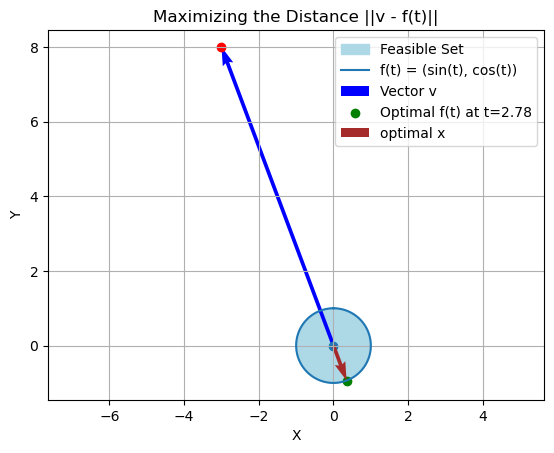

In [4]:
def f(t): return np.array([np.sin(t), np.cos(t)])
    
def objective(t, v):
    """||v - f(t)||^2"""
    ft = f(t)
    return -np.sum((v - ft)**2)


def gradient(t, v):
    grad_sin = 2 * (v[0] - np.sin(t)) * np.cos(t)  # derivative w.r.t. sin(t)
    grad_cos = 2 * (v[1] - np.cos(t)) * (-np.sin(t))  # derivative w.r.t. cos(t)
    return grad_sin + grad_cos

def gradient_descent(v, learning_rate=0.1, num_iterations=1000, tolerance=1e-6):

    t = np.random.rand() * 2 * np.pi 
    prev_objective = objective(t, v)

    # Gradient descent loop
    for i in range(num_iterations):
        grad = gradient(t, v)
        t = t - learning_rate * grad  # Update
        t = t % (2 * np.pi)

        # Checking for convergence
        current_objective = objective(t, v)
        if np.abs(current_objective - prev_objective) < tolerance:
            print(f"Converged after {i} iterations.")
            break
        prev_objective = current_objective

    return t

v: Final[np.array] = np.array([-3, 8])

optimal_t = gradient_descent(v, learning_rate=0.1, num_iterations=1000, tolerance=1e-6)


print(f"Optimal t: {optimal_t}")
t_values = np.linspace(0, 2 * np.pi, 100)
f_values = np.array([f(t) for t in t_values])
plt.fill(f_values[:, 0], f_values[:, 1], color='lightblue', label='Feasible Set')

plt.plot(f_values[:, 0], f_values[:, 1], label='f(t) = (sin(t), cos(t))')
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vector v')

plt.scatter(v[0], v[1], color='red')
plt.scatter(0,0)
optimal_f = f(optimal_t)
plt.scatter(optimal_f[0], optimal_f[1], color='green', label=f'Optimal f(t) at t={optimal_t:.2f}')
plt.quiver(0, 0, optimal_f[0], optimal_f[1], angles='xy', scale_units='xy', scale=1, color='brown', label='optimal x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Maximizing the Distance ||v - f(t)||')
plt.grid(True)
plt.axis('equal')
plt.show()

# Problem 4

We note that the goal is to maximize the light intensity. We denote Light intensity at height $y$ as $L(y)$

Since intensity decreases when we move from the bottom to the top linearly with a factor of $d$, we denote:
$$L(y) = 1-\frac{dy}{h}$$


We let $x_1$ be the $x$ coordinate of the bottom left part of the window and $x_1 + a$ be the x coordinate of the bottom right of the window.

We also let $y_1$ and $y_1+b$ be the $y$ coordinates of the bottom and the top corners of the window respectively.

Therefore, the area of the window would be given by $ab$, hence the price to be paid would be $abp$. We note that $abp \leq C$ 


In order to calculate the light intensity coming in, we will need to integrate over the dimensions of the window while considering $L(y)$. This is given below:
$$L = \int_{x_1}^{x_1+a} \int_{y_1}^{y_1+b}  L(y) \,dy dx$$
$$L = \int_{x_1}^{x_1+a} \int_{y_1}^{y_1+b}   (1-\frac{dy}{h})\,dy dx$$

$$L = \int_{x_1}^{x_1+a} \frac{b \left(h - d\right) \left(2y_{1} + b\right)}{2h} dx$$

Since the intensity does not depend on x the integration over simply multiplies by the window's width, which is $a$

Therefore, $$L= \frac{ab \left(h - d\right) \left(2y_{1} + b\right)}{2h}$$

Therefore the optimization problem is:
$$\min \frac{-ab \left(h - d\right) \left(2y_{1} + b\right)}{2h}$$
s.t$$  y_1 \geq 0$$
$$a \geq 0$$
$$b \geq 0$$
$$h \gt 0$$
$$d \geq 0$$
$$-y_1 -b \geq -h$$
$$-ab \geq \frac{-C}{p}$$


From the optimization problem above, we see that we can further simplify this by getting rid of the 

Optimization Successful: True
Optimal y1: 64.32272816003619
Optimal a: 8.807049212856178
Optimal b: 5.677270392133991
Minimum Value: -3252.52886550204
Optimization Message: Optimization terminated successfully.


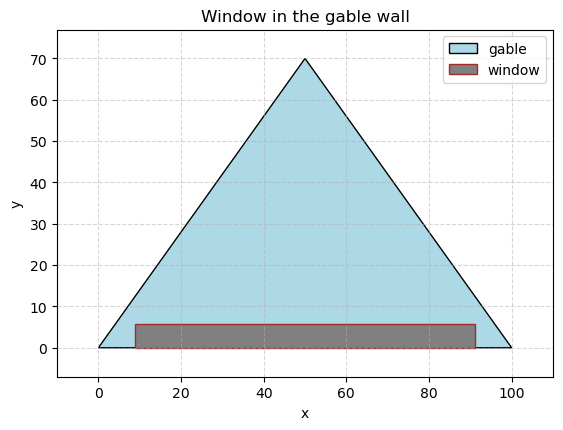

In [5]:
def objective_function(x: list, params: dict) -> float:
    """
    Objective function.. will be called in the solve function

    x contains [y1, a, b] and params are the inputs that will be given by us.
    Output of this function will be a float.
    """
    y1, a, b = x
    w, h, d, p, C = params['w'], params['h'], params['d'], params['p'], params['C']
    
    # Manually Checking for constraints. If any one of these are not met, the method will not converge. 
    if (y1 < 0 or a < 0 or b < 0 or h <= 0 or d < 0 or 
        -(y1 + b) < -h or -a * b < -C / p):
        return np.inf
    return -a * b * (h - d) * (2 * y1 + b) / (2 * h)

def solve(w, h, d, p, C, initial_guess=None):
    """
    Solved using Nelder mead algorithm
    """
    
    params = {
        'w': w, 
        'h': h, 
        'd': d, 
        'p': p, 
        'C': C
    }
    
    if not initial_guess:
        initial_guess = [h/2, 1.0, 1.0]
    
    result = minimize(
        objective_function, 
        initial_guess, 
        args=(params,),
        method='Nelder-Mead'
    )
    
    return result


def plot_gable(w, h):
    """Function to plot the gable and window inside it after optimization"""
    gable_vertices = [
        [0, 0],         
        [w, 0],         
        [w / 2, h]    
    ]

    window_vertices = [
        [result.x[1], 0],
        [100-result.x[1], 0],
        [100-result.x[1], result.x[2]],
        [result.x[1], result.x[2]],
        
    ]
    fig, ax = plt.subplots()
    gable = patches.Polygon(gable_vertices, closed=True, edgecolor='black', facecolor='lightblue', label="gable")
    window = patches.Polygon(window_vertices, closed=True, edgecolor='brown', facecolor='grey', label = "window")
    ax.add_patch(gable)
    ax.add_patch(window)
    
    ax.set_xlim(-0.1 * w, 1.1 * w)
    ax.set_ylim(-0.1 * h, 1.1 * h)
    ax.set_aspect('equal')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.legend()
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.title(f'Window in the gable wall')
    plt.show()
    

# Trial with random inputs
w = 100.0  
h = 70.0  
d = 2.20  
p = 2   
C = 100 
result = solve(w, h, d, p, C)

print("Optimization Successful:", result.success)
print("Optimal y1:", result.x[0])
print("Optimal a:", result.x[1])
print("Optimal b:", result.x[2])
print("Minimum Value:", result.fun)
print("Optimization Message:", result.message)
plot_gable(w=w, h=h)


We note that the minimum value is negative since we negated the objective function to turn the problem into standard form.